In [2]:
!conda install -c conda-forge geopy --yes

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    openssl-1.1.1f             |       h516909a_0         2.1 MB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1

In [40]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt


print('Libraries imported.')

Libraries imported.


In [4]:
data = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')

In [5]:
df = data[0]
df = df.replace('Not assigned', np.nan)
df.rename(columns={'Postal code': 'PostalCode'}, inplace=True)
df.head()

,PostalCode,Borough,Neighborhood
0,M1A,NaN,NaN
1,M2A,NaN,NaN
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Regent Park / Harbourfront


In [6]:
df = df.dropna()
df = df.reset_index(drop = True)
df.head()

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Regent Park / Harbourfront
3,M6A,North York,Lawrence Manor / Lawrence Heights
4,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government


In [7]:
for index, row in df.iterrows():
    if pd.isna(row['Neighborhood']):
        row['Neighnorhood'] = row['Borough']

In [8]:
df.head()

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Regent Park / Harbourfront
3,M6A,North York,Lawrence Manor / Lawrence Heights
4,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government


In [9]:
df = df.replace(r' / ',', ', regex=True)
df.head()

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [10]:
df.shape

(103, 3)

In [11]:
coords_df = pd.read_csv("http://cocl.us/Geospatial_data")
coords_df.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [12]:
coords_df.rename(columns={'Postal Code': 'PostalCode'}, inplace=True)
coords_df.head()

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [13]:
df = df.merge(coords_df, on="PostalCode", how="left")
df.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [14]:
df_toronto = df.drop(['PostalCode', 'Borough'], axis=1)
df_toronto

,Neighborhood,Latitude,Longitude
0,Parkwoods,43.753259,-79.329656
1,Victoria Village,43.725882,-79.315572
2,"Regent Park, Harbourfront",43.654260,-79.360636
3,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
5,Islington Avenue,43.667856,-79.532242
6,"Malvern, Rouge",43.806686,-79.194353
7,Don Mills,43.745906,-79.352188
8,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,"Garden District, Ryerson",43.657162,-79.378937


In [15]:
CLIENT_ID = 'ZSGV0LWLSBTOYV0ZPAMTXKTFORCBBGXXU1SDHKDYDWUC2G4K' # your Foursquare ID
CLIENT_SECRET = 'TPTWMROUL4JEEAGH4T3OICFR1JG5DJX10Z0FBCMF3WFBMZHT' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ZSGV0LWLSBTOYV0ZPAMTXKTFORCBBGXXU1SDHKDYDWUC2G4K
CLIENT_SECRET:TPTWMROUL4JEEAGH4T3OICFR1JG5DJX10Z0FBCMF3WFBMZHT


Function taken from week 3 lab

In [16]:
LIMIT = 100
radius = 500

def getNearbyVenues(names, latitudes, longitudes, radius=500, search_query='Restaurant'):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&query={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
            search_query)
            
        # make the GET request
        #results = requests.get(url).json()['response']['venues']
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) 
            for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [18]:
toronto_venues = getNearbyVenues(names=df_toronto['Neighborhood'],
                                   latitudes=df_toronto['Latitude'],
                                   longitudes=df_toronto['Longitude']
                                  )

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Queen's Park, Ontario Provincial Government
Islington Avenue
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmount Park
Bayview Village
Downsview
The Danforth West, Ri

In [19]:
print(toronto_venues.shape)
toronto_venues.head()

(1658, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,KFC,43.754387,-79.333021,Fast Food Restaurant
1,Parkwoods,43.753259,-79.329656,Bella Vita Catering & Private Chef Service,43.756651,-79.331524,BBQ Joint
2,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant
3,Victoria Village,43.725882,-79.315572,The Frig,43.727051,-79.317418,French Restaurant
4,Victoria Village,43.725882,-79.315572,Latvian Centre Food Market,43.725677,-79.318248,Deli / Bodega


In [20]:
toronto_venues.groupby('Neighborhood').count()
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 92 uniques categories.


In [22]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Neighborhood,Afghan Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Belgian Restaurant,Bistro,Brazilian Restaurant,Breakfast Spot,Burger Joint,Burrito Place,Cafeteria,Café,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Creperie,Cuban Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Food,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Hakka Restaurant,Hot Dog Joint,Indian Restaurant,Indonesian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Mac & Cheese Joint,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,Noodle House,North Indian Restaurant,Peking Duck Restaurant,Persian Restaurant,Pizza Place,Poke Place,Polish Restaurant,Portuguese Restaurant,Poutine Place,Ramen Restaurant,Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Snack Place,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Steakhouse,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Theme Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
0,Parkwoods,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Parkwoods,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Victoria Village,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Victoria Village,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Victoria Village,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
toronto_onehot.shape

(1658, 93)

In [24]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').sum().reset_index()
toronto_grouped.head()

,Neighborhood,Afghan Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Belgian Restaurant,Bistro,Brazilian Restaurant,Breakfast Spot,Burger Joint,Burrito Place,Cafeteria,Café,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Creperie,Cuban Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Food,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Hakka Restaurant,Hot Dog Joint,Indian Restaurant,Indonesian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Mac & Cheese Joint,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,Noodle House,North Indian Restaurant,Peking Duck Restaurant,Persian Restaurant,Pizza Place,Poke Place,Polish Restaurant,Portuguese Restaurant,Poutine Place,Ramen Restaurant,Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Snack Place,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Steakhouse,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Theme Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
0,Agincourt,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Alderwood, Long Branch",0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Bathurst Manor, Wilson Heights, Downsview North",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,Bayview Village,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Bedford Park, Lawrence Manor East",0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,0


In [25]:
toronto_grouped.shape

(88, 93)

In [26]:
test_df = toronto_onehot.sum()
test_df.drop(labels='Neighborhood', inplace = True)
test_df.sort_values(ascending=False)

Restaurant                         193
Café                               132
Pizza Place                        104
Italian Restaurant                  83
Bakery                              68
Sushi Restaurant                    61
Japanese Restaurant                 61
American Restaurant                 47
Chinese Restaurant                  45
Fast Food Restaurant                44
Breakfast Spot                      41
Sandwich Place                      39
Burger Joint                        38
Deli / Bodega                       35
Thai Restaurant                     33
Seafood Restaurant                  32
Asian Restaurant                    31
Gastropub                           28
Greek Restaurant                    28
Salad Place                         27
Diner                               26
Mexican Restaurant                  25
Steakhouse                          25
Vegetarian / Vegan Restaurant       25
Middle Eastern Restaurant           24
Indian Restaurant        

In [27]:
most_popular_toronto = toronto_grouped[['Neighborhood', 'Restaurant', 'Italian Restaurant', 'Sushi Restaurant', 'Japanese Restaurant', 'American Restaurant', 'Chinese Restaurant', 'Fast Food Restaurant', 'Thai Restaurant', 'Seafood Restaurant', 'Asian Restaurant']]
most_popular_toronto

,Neighborhood,Restaurant,Italian Restaurant,Sushi Restaurant,Japanese Restaurant,American Restaurant,Chinese Restaurant,Fast Food Restaurant,Thai Restaurant,Seafood Restaurant,Asian Restaurant
0,Agincourt,0,0,0,0,0,1,0,0,0,0
1,"Alderwood, Long Branch",1,0,0,0,0,0,0,0,0,0
2,"Bathurst Manor, Wilson Heights, Downsview North",2,0,1,0,0,1,0,0,0,0
3,Bayview Village,0,0,0,1,0,1,0,0,0,0
4,"Bedford Park, Lawrence Manor East",3,3,2,1,1,0,0,2,0,0
5,Berczy Park,7,4,2,1,1,0,0,1,2,0
6,"Birch Cliff, Cliffside West",0,0,0,1,0,0,0,0,0,0
7,"Brockton, Parkdale Village, Exhibition Place",2,1,0,1,0,0,0,0,0,0
8,Business reply mail Processing CentrE,1,0,0,0,0,0,2,0,0,0
9,"CN Tower, King and Spadina, Railway Lands, Har...",0,0,0,0,1,0,0,0,0,0


In [54]:
restaurants = most_popular_toronto.drop(['Neighborhood'], axis = 1)
restaurants = restaurants.transpose()
restaurants['Total'] = restaurants.sum(axis = 1)
restaurants = restaurants[['Total']]
restaurants.sort_values(by='Total', inplace=True)

Text(0.5, 1.0, 'Top ten restaurant types in Toronto')

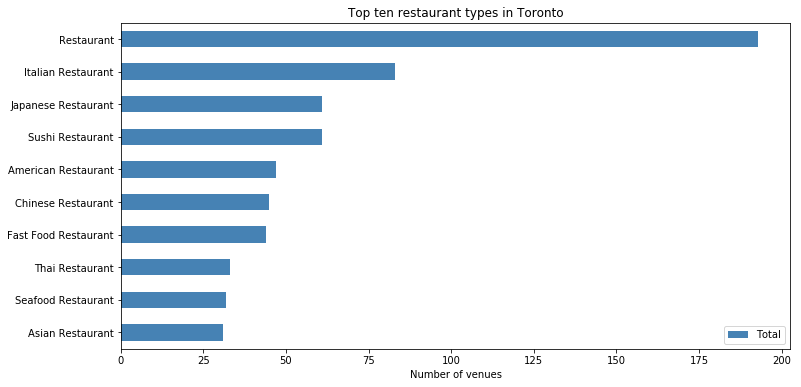

In [55]:
restaurants.plot(kind='barh', figsize=(12, 6), color='steelblue')
plt.xlabel('Number of venues')
plt.title('Top ten restaurant types in Toronto')

In [69]:
most_popular_toronto

,Neighborhood,Restaurant,Italian Restaurant,Sushi Restaurant,Japanese Restaurant,American Restaurant,Chinese Restaurant,Fast Food Restaurant,Thai Restaurant,Seafood Restaurant,Asian Restaurant
0,Agincourt,0,0,0,0,0,1,0,0,0,0
1,"Alderwood, Long Branch",1,0,0,0,0,0,0,0,0,0
2,"Bathurst Manor, Wilson Heights, Downsview North",2,0,1,0,0,1,0,0,0,0
3,Bayview Village,0,0,0,1,0,1,0,0,0,0
4,"Bedford Park, Lawrence Manor East",3,3,2,1,1,0,0,2,0,0
5,Berczy Park,7,4,2,1,1,0,0,1,2,0
6,"Birch Cliff, Cliffside West",0,0,0,1,0,0,0,0,0,0
7,"Brockton, Parkdale Village, Exhibition Place",2,1,0,1,0,0,0,0,0,0
8,Business reply mail Processing CentrE,1,0,0,0,0,0,2,0,0,0
9,"CN Tower, King and Spadina, Railway Lands, Har...",0,0,0,0,1,0,0,0,0,0


In [94]:
#Now I create 5 dataframes, one for each of the top 5 restaurants
neighborhoods_df = most_popular_toronto.set_index('Neighborhood')

In [110]:
dataf = neighborhoods_df[['Restaurant', 'Italian Restaurant', 'Japanese Restaurant']]
dataf2 = dataf[(dataf.T != 0).any()] #Remove rows with all zeros, as it may be residential areas with no restaurants
print(dataf.shape, dataf2.shape)
dataf2

(88, 3) (58, 3)


,Restaurant,Italian Restaurant,Japanese Restaurant
Neighborhood,,,
"Alderwood, Long Branch",1,0,0
"Bathurst Manor, Wilson Heights, Downsview North",2,0,0
Bayview Village,0,0,1
"Bedford Park, Lawrence Manor East",3,3,1
Berczy Park,7,4,1
"Birch Cliff, Cliffside West",0,0,1
"Brockton, Parkdale Village, Exhibition Place",2,1,1
Business reply mail Processing CentrE,1,0,0
Canada Post Gateway Processing Centre,1,0,0


Text(0.5, 1.0, 'Restaurants in toronto')

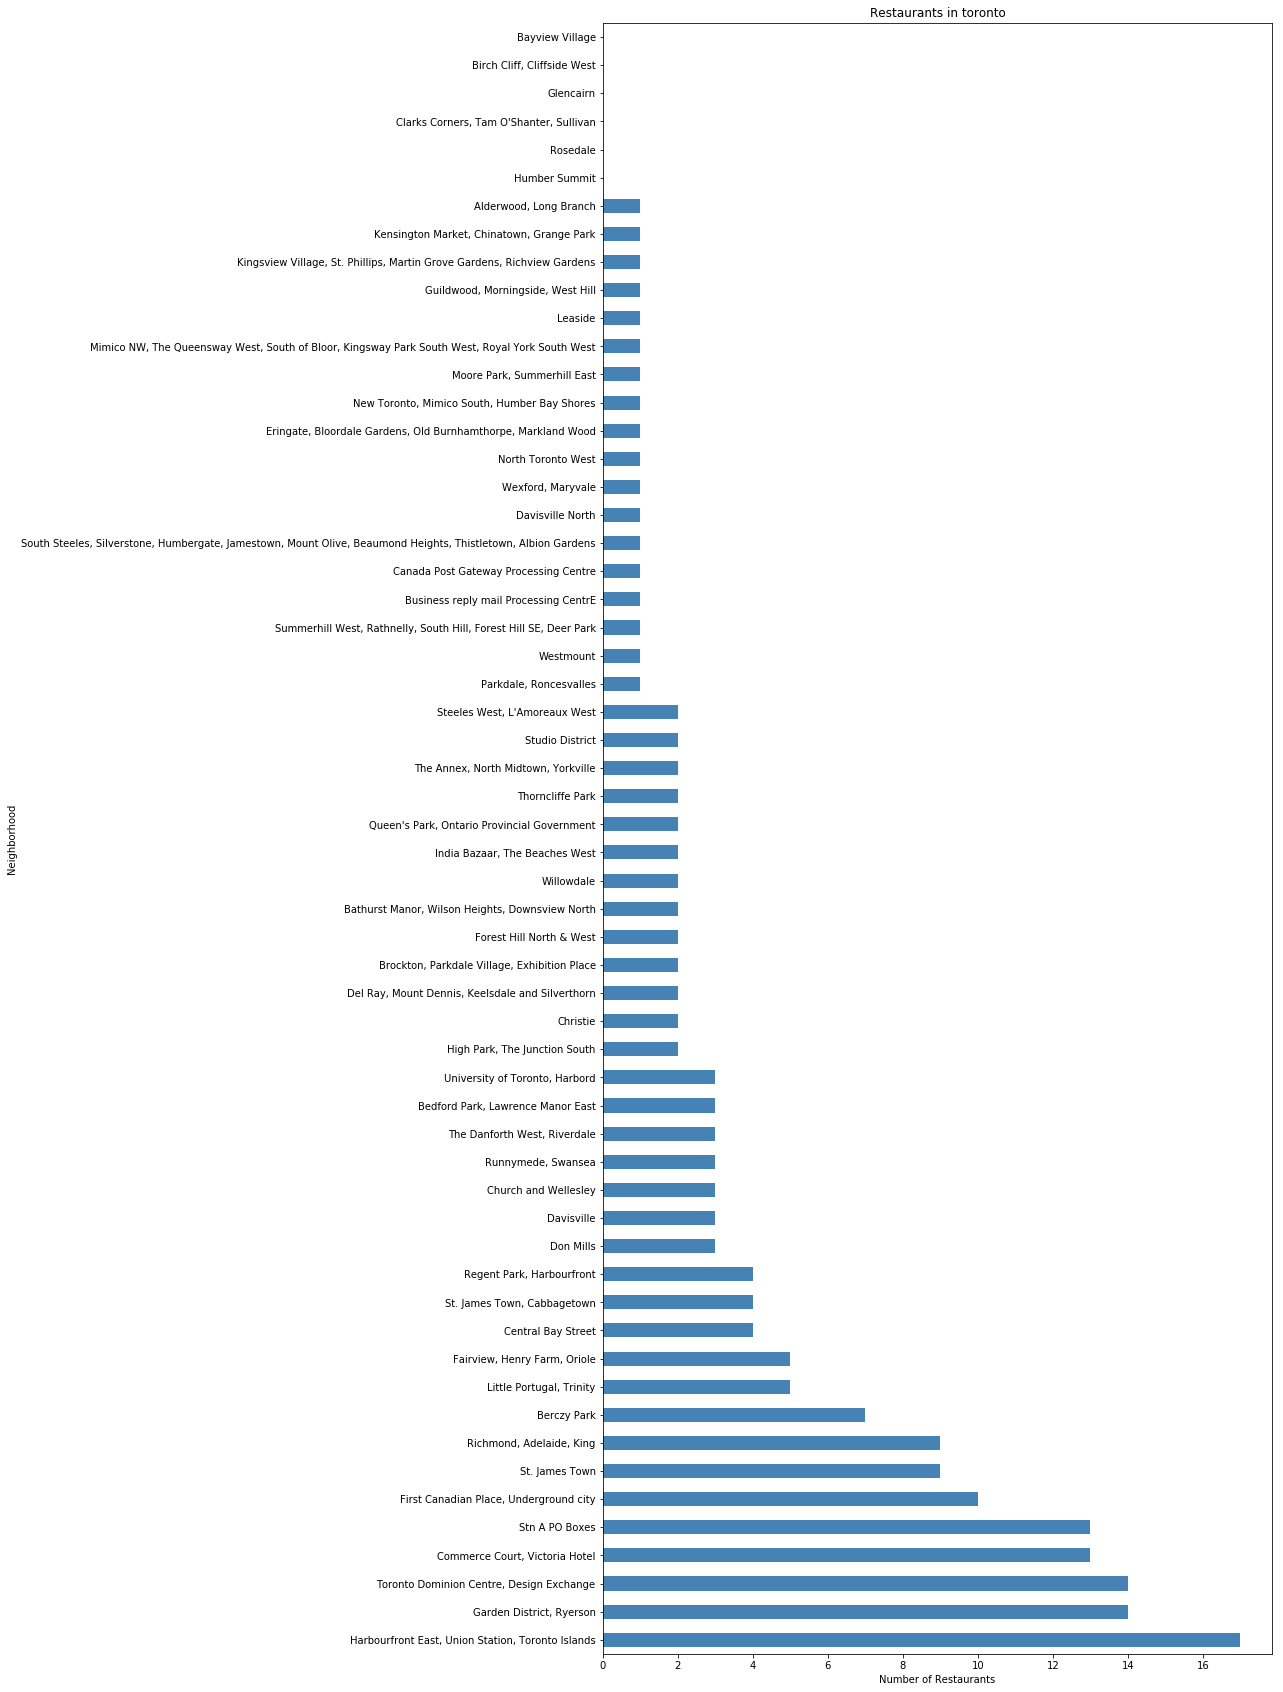

In [111]:
dataf2['Restaurant'].sort_values(ascending=False).plot(kind='barh', figsize=(12, 30), color='steelblue')
plt.xlabel('Number of Restaurants')
plt.title('Restaurants in toronto')

Text(0.5, 1.0, 'Italian Restaurants in toronto')

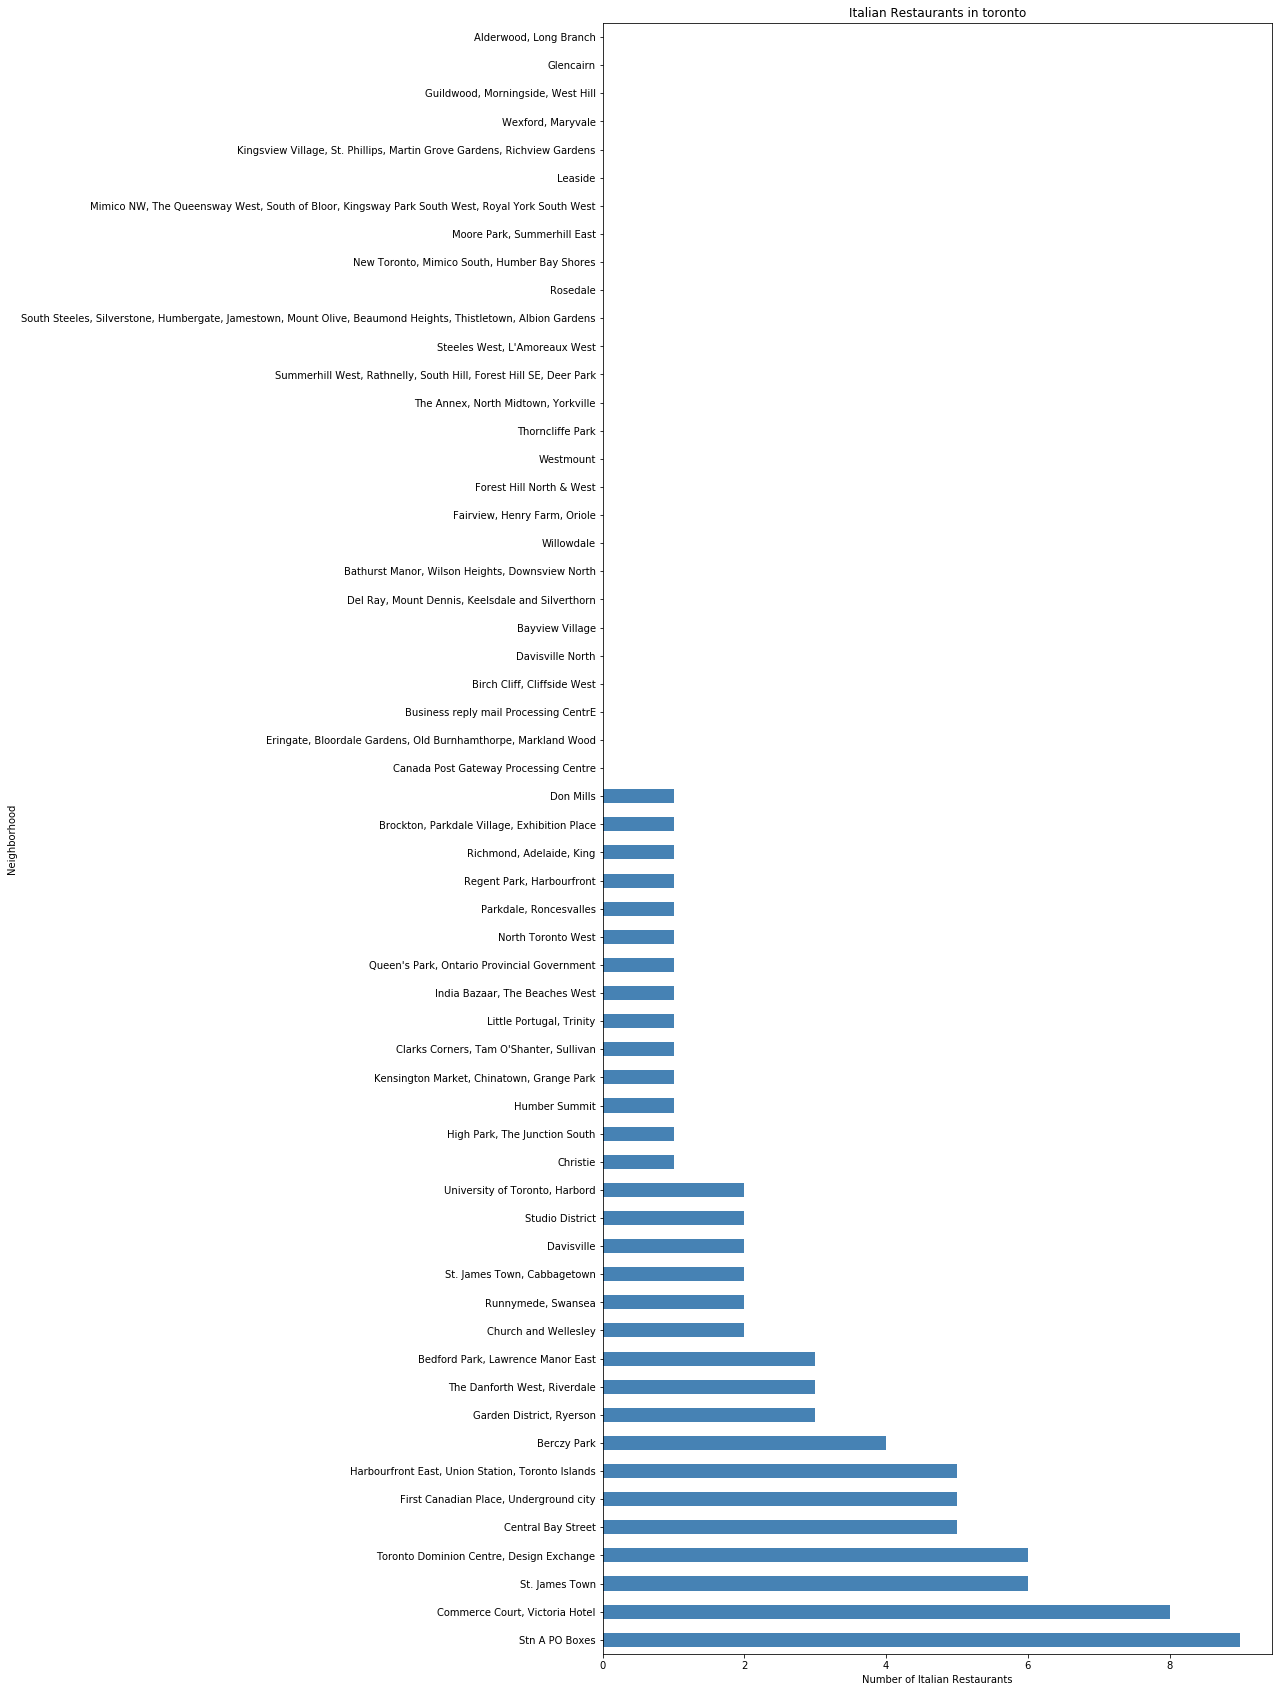

In [112]:
dataf2['Italian Restaurant'].sort_values(ascending=False).plot(kind='barh', figsize=(12, 30), color='steelblue')
plt.xlabel('Number of Italian Restaurants')
plt.title('Italian Restaurants in toronto')

Text(0.5, 1.0, 'Japanese Restaurants in toronto')

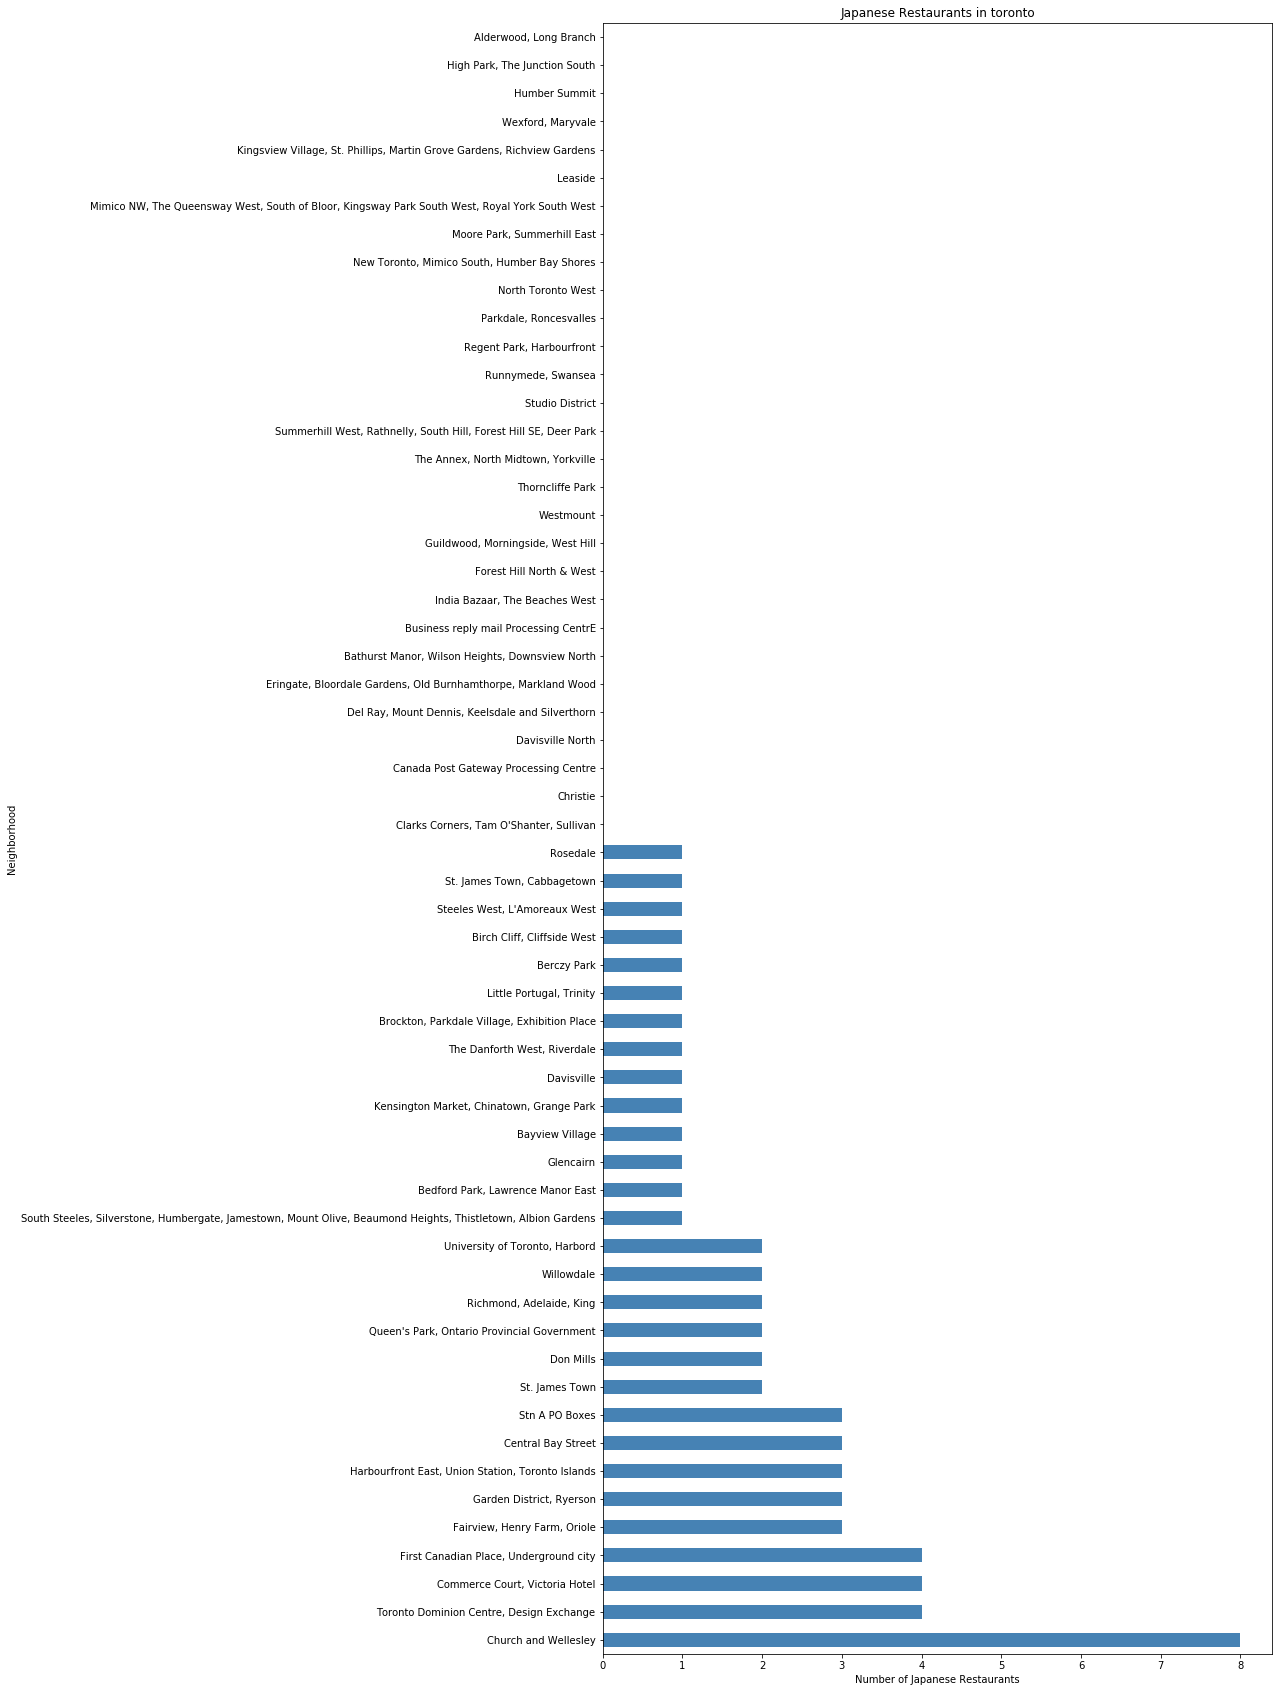

In [113]:
dataf2['Japanese Restaurant'].sort_values(ascending=False).plot(kind='barh', figsize=(12, 30), color='steelblue')
plt.xlabel('Number of Japanese Restaurants')
plt.title('Japanese Restaurants in toronto')